copyright:席灏铖 HAOCHENG XI

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
# 读取CSV文件
file_path = 'singaporeYPdata.csv'
df = pd.read_csv(file_path)  ##, nrows=50
df.head()

,year,totalPopulation
0,1950,1022100
1,1951,1068100
2,1952,1127000
3,1953,1191800
4,1954,1248200


不能显示中文

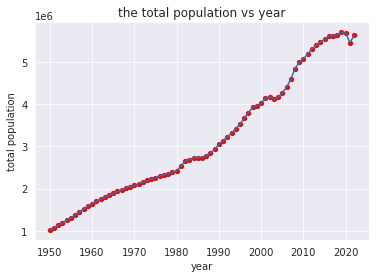

In [39]:

# 将人口数据中的逗号去除并转换为整数
df['totalPopulation'] = df['totalPopulation']
# 设置字体
plt.rcParams['font.family'] = 'Helvetica'

# 绘制折线图
plt.plot(df['year'], df['totalPopulation'])

#绘制散点图
# 获取第一列和第二列数据
x_data = df.iloc[:, 0]
y_data = df.iloc[:, 1]
plt.scatter(x_data, y_data, s=18, c='red')
# 添加标题和坐标轴标签
plt.title('the total population vs year')
plt.xlabel('year')
plt.ylabel('total population')

# 显示图形
plt.show()

Simulate fitting using equations 1, 2, 3, and 4 separately

分别模拟使用1,2,3,4项式拟合

If the coefficient of the first-order term in linear fitting (the first element in coefficient s1) has a large value, there are several possible reasons:
    Unit mismatch: There may be a mismatch between the units in the 'year' column and the units in the 'totalPopulation' column, resulting in an increase in the coefficient of the fitting result. Ensure that the units in both columns are consistent, or convert units according to specific circumstances.
    Data range issue: If the value in the 'year' column is large while the value in the 'totalPopulation' column is relatively small, it may lead to an increase in the coefficient of the fitting result. You can try to standardize or normalize the data to be within a similar range.
    Outliers: There may be outliers in the data that can have a significant impact on the fitting results. Check if the data contains outliers and handle them as needed.
    The data distribution is not suitable for linear fitting: If the data distribution is not suitable for linear fitting, it may lead to unreasonable coefficients in the fitting results. You can consider using higher degree polynomials for fitting, or try other fitting methods such as non-linear fitting.

如果线性拟合的一次项系数 (coefficients1 中的第一个元素) 出现很大的值，有几种可能的原因：

单位不匹配： 可能 'year' 列的单位和 'totalPopulation' 列的单位之间存在不匹配，导致拟合结果的系数变大。确保两列的单位是一致的，或者根据具体情况进行单位转换。

数据范围问题： 如果 'year' 列的数值很大，而 'totalPopulation' 列的数值相对较小，可能会导致拟合结果的系数变大。可以尝试对数据进行标准化或归一化，使其在相近的范围内。

异常值： 数据中可能存在异常值，这些异常值可能会对拟合结果产生较大影响。检查数据是否包含异常值，并根据需要进行处理。

数据分布不适合线性拟合： 如果数据的分布不适合线性拟合，可能会导致拟合结果的系数不合理。可以考虑使用更高次数的多项式进行拟合，或者尝试其他拟合方法，如非线性拟合。

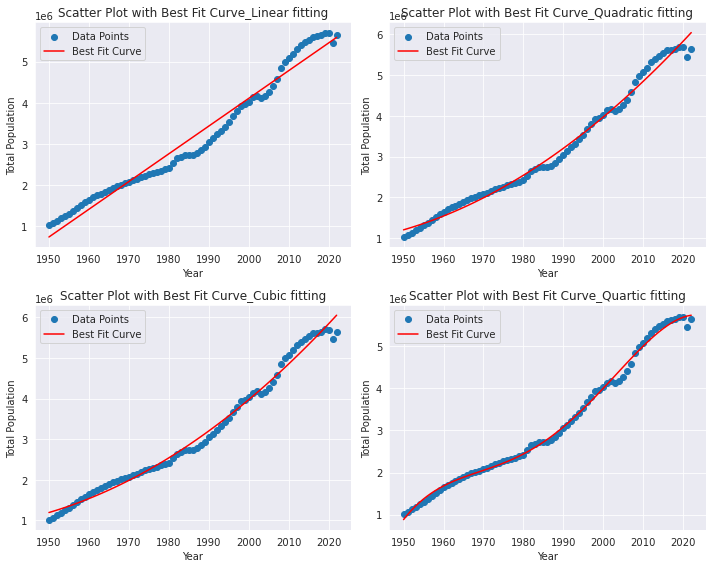

1 Slope: 6.733407685425127
1 Y-intercept: -1.3056208809829641
2 Slope: -207.07950927870365
2 Y-intercept: 19.923611719800473
3 Slope: -44.63173376590944
3 Y-intercept: 9.171021420569206
4 Slope: 2777348.1077113203
4 Y-intercept: -137868.43106847993


In [53]:
# # 使用StandardScaler对输入特征进行标准化
# scaler = StandardScaler()
# df_scaled = df.copy()
# df_scaled[['year', 'totalPopulation']] = scaler.fit_transform(df[['year', 'totalPopulation']])
# 进行多项式拟合
coefficients1 = np.polyfit(df['year'], df['totalPopulation'], 1)
coefficients2 = np.polyfit(df['year'], df['totalPopulation'], 2)
coefficients3 = np.polyfit(df['year'], df['totalPopulation'], 3)
coefficients4 = np.polyfit(df['year'], df['totalPopulation'], 4)
poly_model1 = np.poly1d(coefficients1)
poly_model2 = np.poly1d(coefficients2)
poly_model3 = np.poly1d(coefficients3)
poly_model4 = np.poly1d(coefficients4)

# 创建一个2x2的子图布局
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 绘制第一个小图
axs[0, 0].scatter(df['year'], df['totalPopulation'], label='Data Points')
axs[0, 0].plot(df['year'], poly_model1(df['year']), color='red', label='Best Fit Curve')
axs[0, 0].set_title('Scatter Plot with Best Fit Curve_Linear fitting')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Total Population')
axs[0, 0].legend()

# 绘制第二个小图
axs[0, 1].scatter(df['year'], df['totalPopulation'], label='Data Points')
axs[0, 1].plot(df['year'], poly_model2(df['year']), color='red', label='Best Fit Curve')
axs[0, 1].set_title('Scatter Plot with Best Fit Curve_Quadratic fitting')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Total Population')
axs[0, 1].legend()

# 绘制第三个小图
axs[1, 0].scatter(df['year'], df['totalPopulation'], label='Data Points')
axs[1, 0].plot(df['year'], poly_model3(df['year']), color='red', label='Best Fit Curve')
axs[1, 0].set_title('Scatter Plot with Best Fit Curve_Cubic fitting')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Total Population')
axs[1, 0].legend()

# 绘制第四个小图
axs[1, 1].scatter(df['year'], df['totalPopulation'], label='Data Points')
axs[1, 1].plot(df['year'], poly_model4(df['year']), color='red', label='Best Fit Curve')
axs[1, 1].set_title('Scatter Plot with Best Fit Curve_Quartic fitting')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Total Population')
axs[1, 1].legend()

# 调整布局
plt.tight_layout()

# 显示大图
plt.show()

# 给出最佳拟合线的斜率和y轴截距
# 输出斜率和y轴截距

slope_1st = coefficients1[0]
intercept_1st = coefficients1[1]
print(f"1 Slope: {slope_1st / 1e4}")
print(f"1 Y-intercept: {intercept_1st / 1e8}")

slope_2rd = coefficients2[1]
intercept_2rd = coefficients2[2]
print(f"2 Slope: {slope_2rd / 1e4}")
print(f"2 Y-intercept: {intercept_2rd / 1e8}")

slope_3rd = coefficients3[2]
intercept_3rd = coefficients3[3]
print(f"3 Slope: {slope_3rd / 1e4}")
print(f"3 Y-intercept: {intercept_3rd / 1e8}")

slope_4th = coefficients4[3]
intercept_4th = coefficients4[4]
print(f"4 Slope: {slope_4th / 1e4}")
print(f"4 Y-intercept: {intercept_4th / 1e8}")

We found that the higher the number of fitting iterations, the better the best fitting curve fits the scatter distribution of the original data. However, when the number of iterations is too high, overfitting may occur.


我们发现，拟合次数越高，最佳拟合曲线越贴合原数据散点分布，但当次数过高时，会出现过拟合的现象。


Firstly, we only conduct a linear regression model between population and year, without considering other influencing factors



首先，我们只做人口与年份之间的线性回归模型，不考虑其他影响因素

使用模型来预测

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

训练线性回归模型：


separate dataset

In [43]:
import numpy as np

X_train=x_data[:-3]
y_train=y_data[:-3]
X_test = x_data[-3:]
y_test = y_data[-3:]


X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


训练模型

In [44]:
# 线性回归模型
predictModel = LinearRegression()

# 模型训练
predictModel.fit(X_train, y_train)

# 模型评估
y_predTest = predictModel.predict(X_test)
mseTest = mean_squared_error(y_test, y_predTest)
print('The mean square error (MSE) of the test data is：', mseTest)

y_predTrain = predictModel.predict(X_train)
mseTrain = mean_squared_error(y_train, y_predTrain)
print('The mean square error (MSE) of the train data is：', mseTrain)

The mean square error (MSE) of the test data is： 22398192472.37274
The mean square error (MSE) of the train data is： 69429616682.99309


R-squared
Square (value) is a statistical measure that represents the predictable ratio of variance in the dependent variable to the independent variable. It is a measure of the degree to which the independent variable explains the variability of the dependent variable.

The theoretical maximum value for R-squared is 1.0.

R值 (R-squared)
平方（值）是一种统计度量，表示因变量中的方差与自变量之间可预测的比例。它是自变量对因变量变异性的解释程度的度量。

In [45]:
r_squaredTrain = predictModel.score(X_train, y_train)
print('R^2 of Train set is:',r_squaredTrain)
r_squaredTest = predictModel.score(X_test, y_test)
print('R^2 of Test set is:',r_squaredTest)

R^2 of Train set is: 0.9635652870637061
R^2 of Test set is: -1.240517237016011


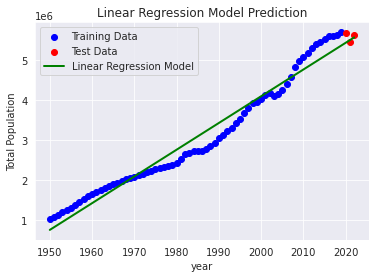

In [46]:
# Scatter plot for original data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Line plot for linear regression model predictions
plt.plot(np.concatenate([X_train, X_test]), np.concatenate([y_predTrain, y_predTest]), color='green', linewidth=2, label='Linear Regression Model')

# Customize the plot
plt.title('Linear Regression Model Prediction')
plt.xlabel('year')
plt.ylabel('Total Population')
plt.legend()

# Show the plot
plt.show()


Prediction of 2023,2030,2050

In [47]:
X_pre=np.array([2023,2030,2050]).reshape(3,1)
y_pre=predictModel.predict(X_pre)
# 输出预测结果
print('The prediction results of population in 2023,2030,2050 are:')
for prediction in y_pre:
    print(int(prediction))

The prediction results of population in 2023,2030,2050 are:
5641279
6110730
7452019


But we believed that the prediction results were not very accurate, so we decided to use polynomial (degree 2, 3, 4) regression to complete the same task


但我们认为预测结果不太准确，于是我们决定使用多项式（2,3,4次）回归来完成同样的任务

`PolynomialFeatures` is a class in the scikit-learn library that is used to generate polynomial features. In linear regression, we typically use first-order features (i.e., the original form of input features), while polynomial regression introduces higher-order powers of the original features to increase the model's complexity.

Specifically, the role of `PolynomialFeatures` is to transform original features into polynomial features. Its output includes all combinations of original features with degrees less than or equal to the specified degree. For example, for a one-dimensional feature x, if we use a second-degree polynomial, `PolynomialFeatures` will generate two features: x and x². If a third-degree polynomial is used, it will generate three features: x, x², and x³, and so on.

The use of polynomial features allows linear regression models to be more flexible, enabling them to capture nonlinear relationships in the data. This can be beneficial in certain cases to improve the model's fitting capabilities.





PolynomialFeatures 是 scikit-learn 库中的一个类，用于生成多项式特征。在线性回归中，我们通常使用一阶特征（即输入特征的原始形式），而多项式回归则引入了原始特征的高次幂，以增加模型的复杂度。

具体来说，PolynomialFeatures 的作用是将原始特征转换成多项式特征，其输出包含原始特征的所有次数小于等于给定度数的组合。例如，对于一个一维特征 x，如果我们使用二次多项式，PolynomialFeatures 将生成 x、x² 这两个特征；如果使用三次多项式，将生成 x、x²、x³ 这三个特征，依此类推。

使用多项式特征可以使线性回归模型更灵活，从而适应数据中的非线性关系。这在某些情况下可能有助于提高模型的拟合能力。


R^2 of Train set (degree 2): 0.9925683439225617
R^2 of Test set (degree 2): -27.304420363046496

(The prediction results of population in 2023,2030,2050 by using polynomial regression (degree 2) are:)
6332955
7181089
9952099
R^2 of Train set (degree 3): 0.9940734273611761
R^2 of Test set (degree 3): -49.61811304040145

(The prediction results of population in 2023,2030,2050 by using polynomial regression (degree 3) are:)
6571101
7683889
11878991
R^2 of Train set (degree 4): 0.9940456199286094
R^2 of Test set (degree 4): -49.59426612608043

(The prediction results of population in 2023,2030,2050 by using polynomial regression (degree 4) are:)
6571155
7685862
11902965


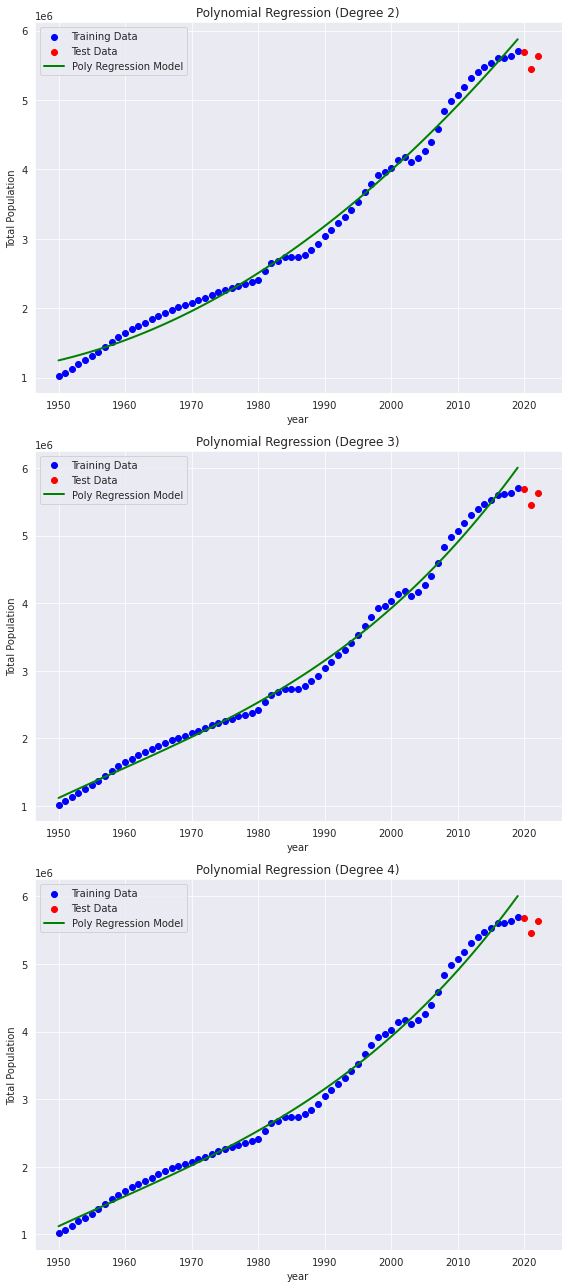

In [52]:
# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Define the degrees for polynomial regression
degrees = [2, 3, 4]

# Create subplots for each degree
fig, axes = plt.subplots(nrows=len(degrees), ncols=1, figsize=(8, 6 * len(degrees)))

for i, degree in enumerate(degrees):
    # Transform the features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_pre_poly = poly.transform(X_pre)

    # Create a polynomial regression model
    poly_model = LinearRegression()

    # Fit the model to the training data
    poly_model.fit(X_train_poly, y_train)

    # Predictions
    y_predTrain_poly = poly_model.predict(X_train_poly)
    y_predTest_poly = poly_model.predict(X_test_poly)
    y_pre_poly = poly_model.predict(X_pre_poly)

    # Calculate R-squared values
    r_squaredTrain_poly = poly_model.score(X_train_poly, y_train)
    r_squaredTest_poly = poly_model.score(X_test_poly, y_test)

    # Print R-squared values
    print(f'R^2 of Train set (degree {degree}): {r_squaredTrain_poly}')
    print(f'R^2 of Test set (degree {degree}): {r_squaredTest_poly}')

    # Plot the original data and the polynomial regression curve
    axes[i].scatter(X_train, y_train, color='blue', label='Training Data')
    axes[i].scatter(X_test, y_test, color='red', label='Test Data')
    axes[i].plot(X_train, y_predTrain_poly, color='green', linewidth=2, label='Poly Regression Model')
    axes[i].set_title(f'Polynomial Regression (Degree {degree})')
    axes[i].set_xlabel('year')
    axes[i].set_ylabel('Total Population')
    axes[i].legend()

    # Output the predicted results for future years
    print(f'\n(The prediction results of population in 2023,2030,2050 by using polynomial regression (degree {degree}) are:)')
    for prediction in y_pre_poly:
        print(int(prediction))

# Show the plots
plt.tight_layout()
plt.show()
